# Universidad Nacional de Colombia  
## Sede Bogotá  
### Facultad de Ingeniería
### Departamento de Ingeniería de Sistemas e Industrial

---

## **Taller de Modelos y Simulación**

**Título del Taller:**  
*Taller 1*

**Estudiantes:**  
*Jare Mijail Ramirez Escalante*

*Juan Jeronimo Gómez Rubiano*  

*Sergio Nicolás Correa Escbobar*

*Laura Sofia Vargas Rodríguez*

**Grupo:**  
*0307*

**Periodo:**  
*2025-1*

**Fecha de entrega:**  
*mayo 09/2025*

---

*El source code junto a este documento es encuentran disponible en el siguiente repositorio publico de github https://github.com/JaredMijailRE/simulador-por-eventos*


# Generacion de Variables Aleatorias

---

## Marco Teorico

### Variables Aleatorias

Una variable aleatoria es una función que permite ir de un conjunto omega (el conjunto de los eventos) a un conjunto numérico, osea le asigna un número real a cada resultado de un experimento aleatorio.

$$
X: \Omega \rightarrow \mathbb{R}
$$

donde:

- $(\Omega)$ es el espacio muestral del experimento aleatorio.

- $(\mathbb{R})$ representa el conjunto de los números reales.

- $(X(\omega))$ es el valor numérico asignado al resultado $(\omega)$.


### Distribucion de probabilidad

Una distribución de probabilidad le asigna a cada valor posible de una variable aleatoria la probabilidad de que dicho valor ocurra. Es decir, le asigna a cada número real —al cual se le ha asociado previamente, a través de la variable aleatoria, como preimagen un evento— la probabilidad de que ese evento ocurra.

Esta puede ser discreta o continua, y a partir de ella se pueden calcular medidas de centralidad como el promedio o la moda, así como también medidas de dispersión (como el rango, la varianza, etc.) y medidas de posición, como los cuartiles.

Dependiendo de si tenemos una distribución discreta o continua, se utiliza una función de masa de probabilidad (PMF) o una función de densidad de probabilidad (PDF), respectivamente. Sin embargo, a partir de estas funciones no siempre se puede obtener directamente una probabilidad, sino que esta se calcula a través de la función de distribución acumulada.

La función de distribución acumulada (CDF) sí entrega probabilidades reales, ya que proporciona el valor acumulado de las mismas. Esta función se obtiene como una sumatoria (en el caso discreto) o una integral (en el caso continuo) sobre la función de masa o densidad de probabilidad.

####  Distribución discreta

Cuando la variable aleatoria es **discreta**, se define una **función de masa de probabilidad (PMF)**:

$$
P(X = x_i) = p(x_i)
$$

Y se cumple que:

$$
\sum_{i} p(x_i) = 1
$$

####  Distribución continua

Cuando la variable aleatoria es **continua**, se define una **función de densidad de probabilidad (PDF)**:

$$
f(x) \geq 0 \quad \text{para todo } x
$$

Y el área total bajo la curva es:

$$
\int_{-\infty}^{\infty} f(x) \, dx = 1
$$

La probabilidad de que la variable esté en un intervalo se calcula como:

$$
P(a \leq X \leq b) = \int_a^b f(x) \, dx
$$

#### Distribucion Triangular

Esta distribucion se caracteriza por contar con puntos a, b y c, de los cuales a es el minimo, b el maximo y c la moda

Su funcion de densidad de probabilidad es la siguiente:

![image.png](attachment:image.png)

Y su funcion de probabilidad acumulada es:

![image-2.png](attachment:image-2.png)

#### Distribucion Trapezoidal

La distribucion trapezoidal es una distribucion continua que se caracteriza por contar con 4 puntos a, b, c y d, de los cuales a es el minimo, b el maximo y c la moda
Su funcion de densidad de probabilidad es la siguiente:

![image.png](attachment:image.png)

Y su funcion de probabilidad acumulada es:

![ ](attachment:image-2.png)

### 1. Metodo Transformada Inversa

Es un metodo utilizado para la generacion de numeros aleatorios, de cualquier distribucion de probabilidad continua, cuando se conoce la inversa de su funcion de distribucion acumulada.

Para este metodo

1. Se genera un numero aleatorio u apartir de la distribucion uniforme en el intervalo (0,1)

2. Se halla la inversa de la funcion de distribucion F

3. Se calcula X, dandole a la inversa de F el valor u

### 2. Metodo de composicion

### 3. Metodo de rechazo

## Desarrolar algoritmos correspondientes

### 1. Desarrollar los algoritmos correspondientes al:


Para las siguientes graficas realizar dos metodos de generacion de variables aleatorias.

![image.png](attachment:image.png)

#### a) método de la transformada inversa

##### primera grafica

Para la primera grafica tenemos una distribucion triangular, ya vimos como es su funcion de distribucion acumulada, de forma que necesitamos la inversa de esta funcion lo que corresponde a:

$$
F^{-1}(u) =
\begin{cases}
a + \sqrt{u (b - a)(c - a)} & \text{si } u < \frac{c - a}{b - a} \\
b - \sqrt{(1 - u)(b - a)(b - c)} & \text{si } u \geq \frac{c - a}{b - a}
\end{cases}
$$

ahora solo tenemos que implementar esta misma funcion en python realmente solo necesitamos escribir las dos formulas y un condicional, esta formula es general de forma que esta funcion de python va a recibir como parametros tres variables, correspondientes a las incognitas de nuestra ecuacion.


In [ ]:
import numpy as np
from numba import jit

@jit(nopython=True)
def inverse_cdf_triangular(a, b, c):
    u = np.random.uniform(0, 1)
    Fc = (c - a) / (b - a)
    if u < Fc:
        return a + np.sqrt(u * (b - a) * (c - a))
    else:
        return b - np.sqrt((1 - u) * (b - a) * (b - c))

Ahora vamos a definir nuestros puntos en variables, que recordemos solo utilizamos nuestra coordenada X

In [ ]:
a = 8 # inicio del triangulo
b = 10 # fin del triangulo
c = 9 # pico del triangulo

Ahora definimos nuestra funcion de simulacion que simplemente va a correr n veces nuestro generados de numeros aleatorios.

In [ ]:
def simulation(n, funcion):
    result = np.empty(n, dtype=np.float64)
    for i in range(n):
        result[i] = funcion()
    return result

Ahora vamos a ejecutar nuestra simulacion, vamos a ver los primeros 10 resultados y despues graficaremos nuestra distribucion.

In [ ]:
result = simulation(100000000, lambda: inverse_cdf_triangular(a, b, c))
print("Simulación de 100,000,000 muestras de la distribución triangular:")
print(result[:10])

Simulación de 100,000,000 muestras de la distribución triangular:
[9.32993664 9.03157125 8.23736962 9.4217733  9.11089219 8.44722576
 9.51666339 9.14214518 8.33786169 9.11517856]


In [ ]:
import matplotlib.pyplot as plt

def makeGraph(result):
    plt.hist(result, bins=1000, density=True)
    plt.title("Distribución")
    plt.xlabel("x")
    plt.ylabel("Densidad")

    plt.show()

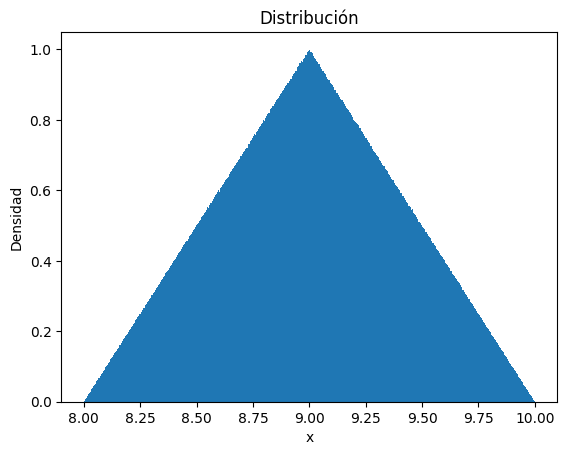

In [ ]:
makeGraph(result)

Como podemos observar hemos generado numeros aleatorios para la distribucin deseada.

##### segunda grafica

Nuestra segunda grafica es una distribucion trapezoidal por tanto realizaremos un procedimiento similar utilizando su funcion de distribucion acumulada.

In [ ]:
@jit(nopython=True)
def inverse_cdf_trapezoidal( a, b, c, d):
    u = np.random.random()

    h = 2 / (d + c - a - b)

    A1 = (b - a) * h / 2
    A2 = (c - b) * h
    A3 = (d - c) * h / 2

    if u < A1:
        return a + np.sqrt((2 * u * (b - a)) / h)
    elif u < A1 + A2:
        return b + (u - A1) / h
    elif u <= 1.0:
        z = u - A1 - A2
        return d - np.sqrt((2 * (A3 - z) * (d - c)) / h)
    else:
        raise ValueError("u debe estar en el intervalo [0, 1]")

En el anterior codigo implementamos en una funcion de python la inversa de la distribucion acumulada de esta distribucion que corresponde a:

## Inversa de la Función de Distribución Acumulada (CDF) – Distribución Trapezoidal

La distribución trapezoidal está definida por cuatro parámetros: \( a < b \leq c < d \). Su densidad tiene forma trapezoidal, con tramos lineales ascendentes y descendentes, y un tramo constante entre \( b \) y \( c \).

La inversa de su función de distribución acumulada (CDF) se expresa por tramos, según el valor de una variable uniforme \( u \sim \mathcal{U}(0,1) \), de la siguiente manera:

1. Altura del trapecio:

$$
h = \frac{2}{(d + c - a - b)}
$$

2. Áreas acumuladas de los tres segmentos de la función:

- Área bajo la rampa creciente (de \( a \) a \( b \)):

$$
A_1 = \frac{(b - a) \cdot h}{2}
$$

- Área bajo la parte constante (de \( b \) a \( c \)):

$$
A_2 = (c - b) \cdot h
$$

- Área bajo la rampa decreciente (de \( c \) a \( d \)):

$$
A_3 = \frac{(d - c) \cdot h}{2}
$$

3. Inversa de la CDF por tramos:

- Si \( u < A_1 \):

$$
x = a + \sqrt{\frac{2u(b - a)}{h}}
$$

- Si \( A_1 \leq u < A_1 + A_2 \):

$$
x = b + \frac{u - A_1}{h}
$$

- Si \( A_1 + A_2 \leq u \leq 1 \):

$$
x = d - \sqrt{\frac{2(d - c)(A_3 - (u - A_1 - A_2))}{h}}
$$

Esta función permite generar muestras aleatorias que siguen una distribución trapezoidal mediante el método de la transformada inversa.


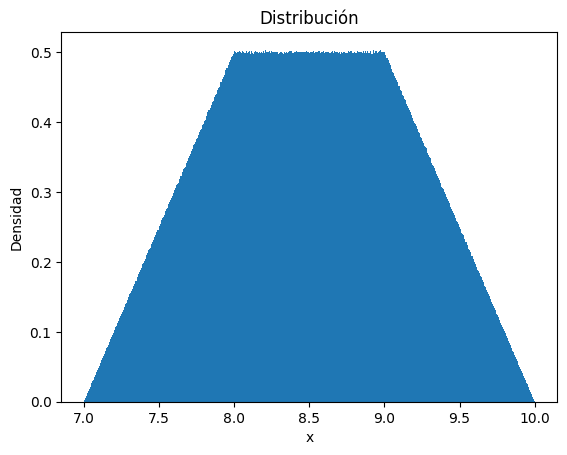

In [ ]:
d = 7
result = simulation(100000000, lambda: inverse_cdf_trapezoidal(d, a, c, b))
makeGraph(result)

Ahora simplemente corremos multiples veces nuestra generacion de variables aleatorias y creamos la grafica de la misma, en donde obtenemos la forma esperada, la imagen como tal no establece los puntos sin embargo usamos los que ya teniamos mas uno que nos faltaba

#### b) método de composición

### 2. Generar las distribuciones por el método de rechazo


##### primera grafica

Para la primera grafica tenemos una distribucion continua definida constante por tramos:

$$
f(x) =
\begin{cases}
0.75 & \text{si } 0 \leq x < 1 \\\\
0.25 & \text{si } 1 \leq x \leq 2 \\\\
0 & \text{en otro caso}
\end{cases}
$$

Esta función puede utilizarse como la densidad objetivo en un método de rechazo.


In [ ]:
import numpy as np
from numba import jit

@jit(nopython=True)
def target_pdf_c(x) -> float:
        if 0 <= x < 1:
            return 0.75
        elif 1 <= x <= 2:
            return 0.25
        else:
            return 0.0

Ahora vamos a definir nuestra función propuesta para aplicar el método de rechazo y la constante de cota correspondiente:

In [ ]:
@jit(nopython=True)
def proposal_Sampler_c() -> float:
        return np.random.uniform(0, 2)

M_c = 1.5

Luego hay que definir el generador de variables por el método de rechazo, ya hemos visto la condición:

In [ ]:
@jit(nopython=True)
def rejection_Method(target_pdf, proposal_sampler, M) -> float:
    while True:
        x = proposal_sampler()
        u = np.random.random()
        if u < target_pdf(x) / M:
            return x

Ahora definimos la funcion de muestras que va a ejecutar n veces el generador.

In [ ]:
def sampling(n_Samples, func) -> np.ndarray:
    samples = np.empty(n_Samples)
    for i in range(n_Samples):
        samples[i] = func()
    return samples

Ya se procede a ejecutar la generación de muestra, se muestran los primeros resultados y posteriormente una gráfica.

In [ ]:
n_Samples = 1000000
samples_c = sampling(n_Samples, lambda: rejection_Method(target_pdf_c, proposal_Sampler_c, M_c))
print(samples_c[:10])

[0.51799156 1.10349468 0.13104289 1.24960037 0.44199306 1.53256979
 0.68662064 0.12634019 1.84672691 0.89352797]


In [ ]:
import matplotlib.pyplot as plt

def rej_Make_Graph(samples,title) -> None:
    plt.figure(figsize=(10, 5))
    plt.hist(samples, bins=1000, density=True, alpha=0.7, color='skyblue')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('Densidad')
    plt.grid(True)
    plt.show()

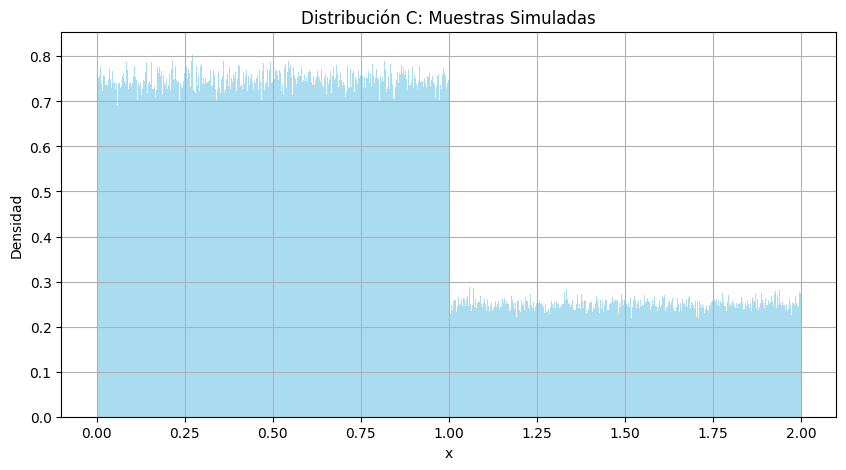

In [ ]:
rej_Make_Graph(samples_c, "Distribución C: Muestras Simuladas")

Como podemos observar hemos generado numeros aleatorios para la distribucin deseada.

##### segunda grafica

La segunda grafica es una distribucion que puede considerarse trapezoidal. Sin embargo, el procedimiento no cambia mucho. La función es la siguiente:

- En el intervalo \([4, 5)\): la densidad decrece linealmente desde 0.75 hasta 0.25.
- En el intervalo \([5, 6]\): la densidad crece linealmente desde 0.25 hasta 0.75.
- Fuera del intervalo \([4, 6]\), la densidad es cero.

Su definición por tramos es la siguiente:

$$
f(x) =
\begin{cases}
0.75 - 0.5(x - 4) & \text{si } 4 \leq x < 5 \\
0.25 + 0.5(x - 5) & \text{si } 5 \leq x \leq 6 \\
0 & \text{en otro caso}
\end{cases}
$$

Esta función describe una distribución continua no uniforme con forma trapezoidal simétrica, y puede utilizarse como densidad objetivo.


In [ ]:
@jit(nopython=True)
def target_pdf_d(x) -> float:
    if 4 <= x < 5:
        return 0.75 - 0.5 * (x - 4)
    elif 5 <= x <= 6:
        return 0.25 + 0.5 * (x - 5)
    else:
        return 0.0

Se define una función propuesta en el intervalo correcto, nótese que usar uniformes es lo más conveniente por simplicidad.

In [ ]:
@jit(nopython=True)
def proposal_Sampler_d() -> float:
    return np.random.uniform(4, 6)

M_d = 1.5

Finalmente, se hace la generación de muestras y la gráfica que coincide con la forma solicitada.

In [ ]:
samples_d = sampling(n_Samples, lambda: rejection_Method(target_pdf_d, proposal_Sampler_d, M_d))
print(samples_d[:10])

[5.10187048 4.00448777 5.69132907 4.48106585 5.37485537 4.20136877
 5.44897796 5.94699297 4.08956633 5.33902491]


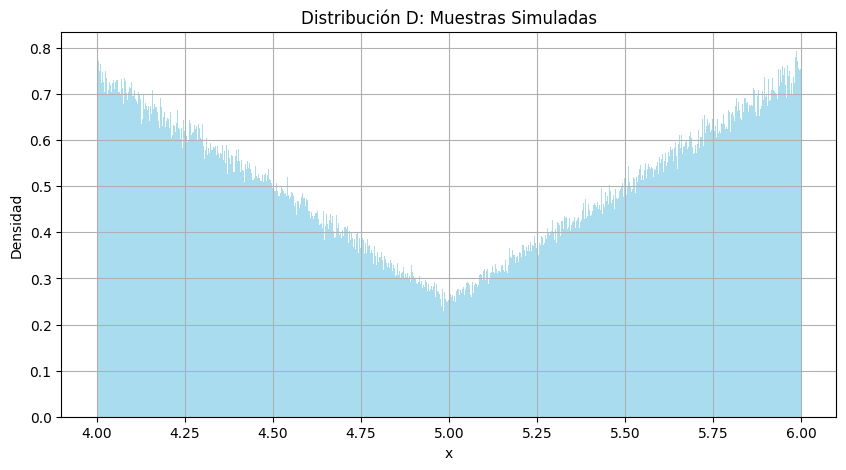

In [ ]:
rej_Make_Graph(samples_d, "Distribución D: Muestras Simuladas")

Para explicar de forma correcta la transformada inversa y los temas siguientes vamos a realizar un repaso de algunos conceptos basicos de estadistica.

### 3. Generar valores aleatorios para una distribución triangular


Ya vimos el caso de una traingular, esta en específico es asimétrica, pero lo que hacemos es usar el método de la inversa, primero obteniendo la siguiente CDF:

$$
F(x) =
\begin{cases}
0, & x < 2 \\
\frac{1}{4}(x - 2)^2, & 2 \leq x \leq 3 \\
x - \frac{x^2}{12} - 2, & 3 < x \leq 6 \\
1, & x > 6
\end{cases}
$$



Para generar valores aleatorios \( x \) a partir de una variable uniforme
\( U(0, 1) \), se usa la función inversa de la CDF por tramos:

- Si \( 0 <= U <= 0.25 \):

$$
x = 2 + 2\sqrt{U}
$$

- Si \( 0.25 < U <= 1 \):

$$
x = 6 - \sqrt{12(1 - U)}
$$


Solo resta programar el algoritmo y generar 10 valores para comparar la media.

In [ ]:
# El archivo de este código se llama a3.py
import numpy as np

def triangular_custom_rvs(n=10, seed=None):
    if seed is not None:
        np.random.seed(seed)
    U = np.random.uniform(0, 1, n)
    X = np.where(
        U <= 0.25,
        2 + 2 * np.sqrt(U),
        6 - np.sqrt(12 * (1 - U))
    )
    return X

# Generar 10 valores
samples = triangular_custom_rvs(10, seed=42)
sample_mean = np.mean(samples)

# Imprimir
print("Valores generados:", samples)
print("Media muestral:", sample_mean)


Valores generados: [3.26037985 5.23095623 4.20665879 3.80543895 2.7899839  2.78992283
 2.48201084 4.73276433 3.81216549 4.12833522]
Media muestral: 3.7238616418485777


Finalmente, se compara con el resultado teórico:

#### Cálculo de la media teórica de la distribución

La media (esperanza) de una variable continua se define como:

$$
\mu = \mathbb{E}[X] = \int_{-\infty}^{\infty} x \cdot f(x)\,dx
$$

Dado que la función de densidad está definida por tramos:

$$
f(x) =
\begin{cases}
\frac{1}{2}(x - 2), & 2 \leq x \leq 3 \\
\frac{1}{2}\left(2 - \frac{x}{3}\right), & 3 < x \leq 6 \\
0, & \text{en otro caso}
\end{cases}
$$

Entonces:

$$
\mu = \int_2^3 x \cdot \frac{1}{2}(x - 2) \, dx + \int_3^6 x \cdot \frac{1}{2}\left(2 - \frac{x}{3}\right) \, dx
$$

### Primer término:

$$
\int_2^3 \frac{1}{2}x(x - 2) \, dx = \frac{1}{2} \int_2^3 (x^2 - 2x) \, dx = \frac{1}{2} \left[ \frac{x^3}{3} - x^2 \right]_2^3
$$

$$
= \frac{1}{2} \left( \left( \frac{27}{3} - 9 \right) - \left( \frac{8}{3} - 4 \right) \right)
= \frac{1}{2} \left( (9 - 9) - \left(\frac{8}{3} - 4\right) \right)
= \frac{1}{2} \left( -\left( \frac{8}{3} - 4 \right) \right)
= \frac{1}{2} \cdot \frac{4}{3} = \frac{2}{3}
$$

##### Segundo término:

$$
\int_3^6 \frac{1}{2}x\left(2 - \frac{x}{3}\right) \, dx = \frac{1}{2} \int_3^6 \left(2x - \frac{x^2}{3}\right) \, dx
= \frac{1}{2} \left[ x^2 - \frac{x^3}{9} \right]_3^6
$$

$$
= \frac{1}{2} \left( (36 - \frac{216}{9}) - (9 - \frac{27}{9}) \right)
= \frac{1}{2} \left( (36 - 24) - (9 - 3) \right)
= \frac{1}{2} (12 - 6) = \frac{1}{2} \cdot 6 = 3
$$

##### Resultado final:

$$
\mu = \frac{2}{3} + 3 = \frac{11}{3} \approx 3.67
$$


### 4. Se nos pide generar un generador de variables aleatorias dadas un CDF

Para resolver este problema, vamos a implementar un generador de variables aleatorias utilizando el método de la transformada inversa. Este método es útil para generar números aleatorios a partir de una función de distribución acumulada (CDF) conocida.

Igualar $F(x)=u$ y resolver por tramos

1. **Si** $u=0$ ó $u=1$ tomamos los extremos:

   $$
   u=0\;\Rightarrow\;x=-3,\qquad
   u=1\;\Rightarrow\;x=4.
   $$

2. **Si** $0<u\le\tfrac12$, entonces $x$ debe hallarse en $(-3,0]$ y

   $$
     F(x)=\tfrac12+\frac{x}{6}=u
     \quad\Longrightarrow\quad
     \frac{x}{6}=u-\tfrac12
     \quad\Longrightarrow\quad
     x=6\bigl(u-\tfrac12\bigr)=6u-3.
   $$

3. **Si** $\tfrac12<u<1$, entonces $x$ está en $(0,4)$ y

   $$
     F(x)=\tfrac12+\frac{x^2}{32}=u
     \quad\Longrightarrow\quad
     \frac{x^2}{32}=u-\tfrac12
     \quad\Longrightarrow\quad
     x=\sqrt{32\bigl(u-\tfrac12\bigr)}.
   $$

   (tomamos la raíz positiva porque en este tramo $x\ge0$.)





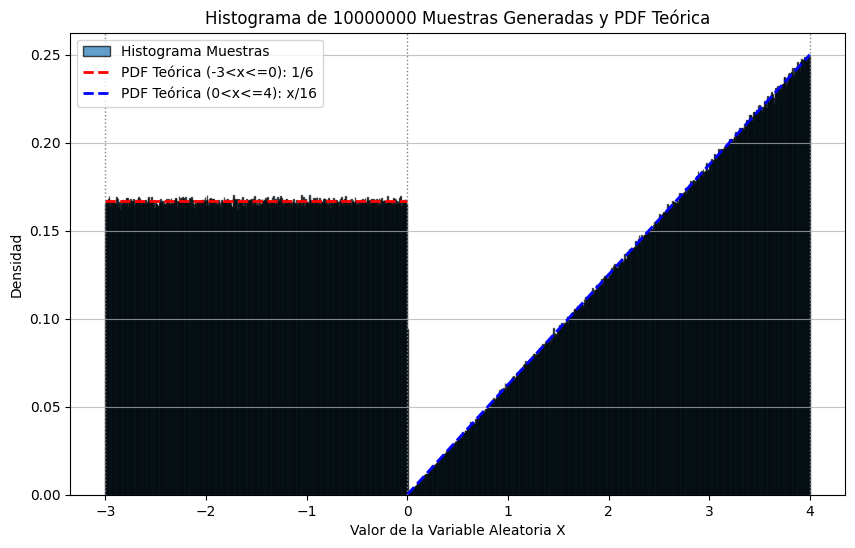

In [ ]:
import random
import math
import matplotlib.pyplot as plt
from numba import njit


@njit
def generador_variable_aleatoria_continua():
    u = random.uniform(0, 1)
    x = 0
    if 0 < u <= 0.5:
        x = 6 * u - 3
    elif 0.5 < u <= 1:
        x = math.sqrt(32 * (u - 0.5))

    if u == 0:
        x = -3
    elif u == 1:
        x = 4

    return x

if __name__ == "__main__":
    num_muestras = 10000000
    muestras_generadas = [generador_variable_aleatoria_continua() for _ in range(num_muestras)]

    plt.figure(figsize=(10, 6))
    plt.hist(muestras_generadas, bins=1000, density=True, edgecolor='black', alpha=0.7, label='Histograma Muestras')
    plt.title(f'Histograma de {num_muestras} Muestras Generadas y PDF Teórica')
    plt.xlabel('Valor de la Variable Aleatoria X')
    plt.ylabel('Densidad')
    plt.grid(axis='y', alpha=0.75)

    segmento1_x = [-3, 0]
    segmento1_y = [1/6, 1/6]

    segmento2_x_vals = []
    current_x = 0.001
    while current_x <= 4:
        segmento2_x_vals.append(current_x)
        current_x += 0.01
    if not segmento2_x_vals or segmento2_x_vals[-1] < 4:
         segmento2_x_vals.append(4)

    segmento2_y_vals = [x_val/16 for x_val in segmento2_x_vals]

    plt.plot(segmento1_x, segmento1_y, color='red', linestyle='--', linewidth=2, label='PDF Teórica (-3<x<=0): 1/6')

    # Adjusting plot for the second segment to connect to the y-axis at x=0 from the right
    if segmento2_x_vals:
      plt.plot([0] + segmento2_x_vals, [0/16] + segmento2_y_vals, color='blue', linestyle='--', linewidth=2, label='PDF Teórica (0<x<=4): x/16')

    plt.axvline(x=-3, color='gray', linestyle=':', linewidth=1)
    plt.axvline(x=0, color='gray', linestyle=':', linewidth=1)
    plt.axvline(x=4, color='gray', linestyle=':', linewidth=1)

    plt.legend()
    plt.show()

Como podemos ver la funcion esta dividida en 4 segmentos principales, y se obtiene el comportamiento esperado a las lineas que pusimos como referencia terorica al resultado.

### 5. Desarrollar generador de variable aleatoria

A continuación, debe desarrollar el generador para variable aleatoria, con la siguiente PDF:

$$
f(x) =
\begin{cases}
  \frac{1}{5} & \text{si } 0 \le x < 3 \\
  \frac{1}{8} & \text{si } 3 \le x \le 9 \\
  0         & \text{en otro caso}
\end{cases}
$$

Para construir un generador de variables aleatorias a partir de una función, esta función debe ser una función de probabilidad válida.
Esto signfica, que se debe cumplir, que la función de distribución acumulada $F(x) = 1$ mencionada al inicio del marco. Esto no ocurre en la siguiente función, como se puede demostrar de manera sencilla:

$$
\int_{a}^{b} f(x) \, dx
$$
$$
\int_{0}^{9} f(x) \, dx = \int_{0}^{3} \frac{1}{5} \, dx + \int_{3}^{9} \frac{1}{8} \, dx
$$
$$
\int_{0}^{3} \frac{1}{5} \, dx = \left[ \frac{1}{5}x \right]_{0}^{3} = \frac{3}{5} - 0 = \frac{3}{5}
$$

$$
\int_{3}^{9} \frac{1}{8} \, dx = \left[ \frac{1}{8}x \right]_{3}^{9} = \frac{9}{8} - \frac{3}{8} = \frac{6}{8} = \frac{3}{4}
$$
$$
\int_{0}^{5} f(x) \, dx = \frac{3}{5} + \frac{3}{4} = \frac{12 + 15}{20} = \frac{27}{20} \neq 1
$$

Por lo tanto, la función anterior como tal, no es una función de probabilidad válida. Sin embargo, como ejercicio intelectual, podemos determinar cómo se construiría un generador de variables aleatoias, con la siguiente función, con una estructura similar a la original:

$$
f(x) =
\begin{cases}
  \frac{1}{5} & \text{si } 0 \le x < 3 \\
  \frac{1}{15} & \text{si } 3 \le x \le 9 \\
  0         & \text{en otro caso}
\end{cases}
$$

Que al realizar la integral correspondiente obtenemos:

$$
\int_{a}^{b} f(x) \, dx
$$
$$
\int_{0}^{9} f(x) \, dx = \int_{0}^{3} \frac{1}{5} \, dx + \int_{3}^{9} \frac{1}{15} \, dx
$$
$$
\int_{0}^{3} \frac{1}{5} \, dx = \left[ \frac{1}{5}x \right]_{0}^{3} = \frac{3}{5} - 0 = \frac{3}{5}
$$

$$
\int_{3}^{9} \frac{1}{15} \, dx = \left[ \frac{1}{8}x \right]_{3}^{9} = \frac{9}{15} - \frac{3}{15} = \frac{6}{15} = \frac{2}{5}
$$
$$
\int_{0}^{5} f(x) \, dx = \frac{3}{5} + \frac{2}{5} = \frac{5}{5} = 1
$$

Como se expuso en los puntos anteriores, para obtener el generador por el método de la inversa, debemos obtener la expresión correspondiente a $F^{-1}(x)$, como mostramos a continuación:

$$
\text{Para}~ 0<x\leq 3 \xrightarrow{} F^{-1}(x) \implies \frac{x}{5} = u \implies x = 5u
$$
$$
\text{Para}~ 3<x\leq 9 \xrightarrow{} F^{-1}(x) \implies \frac{3}{5} + \frac{x-3}{15} = u \implies 15u-6
$$

Ahora que definimos la función inversa, vamos a diseñar su función, y ejecutar su simulación respectiva en Python:

In [ ]:
from numba import jit
import random

@jit(nopython=True)
def random_variable_5():
    u = random.random()  # Uniform [0.0, 1.0)
    if u <= 3/5:
        return 5 * u
    else:
        return 15 * u - 6

Aplicamos la misma función de simulación definida en el punto 1:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

def simulation(n, funcion):
    result = np.empty(n, dtype=np.float64)
    for i in range(n):
        result[i] = funcion()
    return result

@jit(nopython=True)
def makeGraph(result):
    plt.hist(result, bins=1000, density=True)
    plt.title("Distribución")
    plt.xlabel("x")
    plt.ylabel("Densidad")

    plt.show()

result = simulation(1000, random_variable_5)
print("Simulación de 1000 muestras de la distribución triangular:")
print(result[:10])
makeGraph(result)

Simulación de 1000 muestras de la distribución triangular:
[2.33961698 0.51509177 5.66588215 4.56828802 0.24519686 0.6737271
 1.1359768  0.00801054 0.03122463 0.7598427 ]


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
Unknown attribute 'hist' of type Module(<module 'matplotlib.pyplot' from '/home/jujgomezru/miniconda3/envs/py313_env/lib/python3.13/site-packages/matplotlib/pyplot.py'>)

File "../../../../../tmp/ipykernel_9666/2720116586.py", line 13:
<source missing, REPL/exec in use?>

During: typing of get attribute at /tmp/ipykernel_9666/2720116586.py (13)

File "../../../../../tmp/ipykernel_9666/2720116586.py", line 13:
<source missing, REPL/exec in use?>

During: Pass nopython_type_inference

![alt text](diagramas/simulation_5.png)

# Problemas asignados a cada uno del grupo

---

# Modelo SimuladorTaller

**a. Variables de Estado del Sistema**

- `reloj`: Tiempo actual de simulación (minutos).
- `estado_servidores`: Lista de largo `num_reparadores`, con valores `0`=libre, `1`=ocupado.
- `cola`: Lista de instantes de llegada de clientes en espera.
- `tiempo_prox`: Vector de tiempos programados para cada tipo de evento.
- Parámetros de entrada:
  - `media_entre_llegadas`: β de la distribución exponencial de llegadas.
  - `media_servicio`: β de la distribución exponencial de servicio.
  - `tiempo_sim`: Horizonte de simulación (minutos).


**b. Entidades y sus Atributos**

| Entidad  | Atributos                                      |
|----------|------------------------------------------------|
| Cliente  | `t_llegada`: instante de ingreso a cola        |
| Servidor | implícito en `estado_servidores[i]`: libre/ocupado |


**c. Eventos**

| Índice             | Evento                              | Acción principal                                                     |
|--------------------|-------------------------------------|----------------------------------------------------------------------|
| `1`                | Llegada                             | Programar próxima llegada; asignar a servidor libre o encolarlo.     |
| `2 + r` (r=0..R-1) | Fin de servicio en servidor `r`     | Liberar servidor o tomar próximo de la cola; calcular demora y coste.|
| `num_eventos + 1`  | Fin de simulación                   | Terminar bucle y generar reporte.                                    |


**d. Contadores y Acumuladores**

| Variable             | Tipo            | Descripción                                               |
|----------------------|-----------------|-----------------------------------------------------------|
| `total_atendidos`    | Contador entero | Clientes que completaron servicio (sin o con espera).     |
| `count_esperados`    | Contador entero | Clientes que pasaron por cola (esperaron > 0).            |
| `total_esperas`      | Acumulador real | Suma de todos los tiempos de espera en la cola.           |
| `ingresos`           | Acumulador real | Suma de pagos de clientes (delay ≤ garantía).             |
| `costos`             | Acumulador real | Suma de costes de garantía (delay > garantía).            |


**e. Medidas de Desempeño**

| Medida                            | Fórmula / Cálculo                                          |
|-----------------------------------|------------------------------------------------------------|
| Demora promedio en cola           | `total_esperas / count_esperados`                          |
| Tasa de clientes atendidos        | `total_atendidos / (tiempo_sim / media_entre_llegadas)`     |
| Utilidad neta                     | `ingresos - costos`                                        |
| Proporción de clientes tardíos    | `(costos / (ingresos + costos)) * 100 %`                   |


### Problema numero 9
Barcos llegan a un puerto a la tasa de uno cada  1 ±  1/2    horas. Hay 6 muelles para atenderlos. Ellos también requieren  los servicios de una grúa para descargar y hay cinco de ellas. Después de descargar, 10% de los barcos permanecen para recarga de combustible antes de partir; los otros salen inmediatamente. Los barcos no requieren las grúas para la recarga. Simular las colas para los muelles  y las grúas asumiendo que toma  7(1/2)  ±  3  horas para descargar y 1  ± 1/2  horas para la recarga. Simular para que 100 barcos abandonen el puerto.

#### Definicion de valores simulacion

##### Variables estado sistema
Estas son variables que describen al sistema en cierto instante

- clock:
describe el tiempo actual de la simulacion

- lista eventos:
contiene los proximos eventos a ocurri
    - craneExitHeap:
    Representa primero nuestra ocupacion de gruas, ademas de tambien los eventos de salida de la misma
    - portExitHeap:
    Representa los eventos de salida del puerto agendados

- portHeap:
Representa los barcos que estan en nuestro puerto con sus tiempos de llegada

- portQueue:
Representa la cola para entrar a nuestro puerto

- craneQueue:
Representa la cola de espera para una grua

##### Entidades y atributos

La entidad que tendría nuestro programa sería el barco que tendría estos atributos, aunque dado la simulación por eventos estos, no son implementados de forma directa en la simulación, sino que se ven a través de los eventos.

| Atributo              | Descripción                            |
| --------------------- | -------------------------------------- |
| `id`                  | identificador único                    |
| `tLlegada`            | hora de llegada al puerto              |
| `tInicioDescarga`     | hora en que comienza en muelle         |
| `tFinDescarga`        | hora en que sale del muelle            |
| `requiereReabastecer` | booleano (10% con recarga)             |
| `tInicioReabastecer`  | hora en que inicia recarga (si aplica) |
| `tFinReabastecer`     | hora en que termina recarga            |
| `tSalida`             | hora en que finalmente abandona puerto |


##### Eventos

Además de los eventos de inicio y finalización de la simulación tenemos:


- llegada puerto


- salida grúa


- salida puerto


Tenemos estos eventos y podríamos que el subevento de llegada a grúa pero este ocurre dentro de los anteriores eventos, de forma que no es un evento que se programe para ocurrir en algún tiempo.


Una explicación breve de estos eventos aunque se entenderá mejor en el diagrama de flujo, es:


*LLegada puerto*: vemos si hay puertos disponibles, si no hay mandamos el barco a la fila de espera de puertos, si hay vemos si hay grúas, si no hay lo mandamos a la fila de espera de grúas, si hay programamos el evento de salida de la grúa.


*Salida grúa*: Desocupamos la grúa, vemos si hay fila de espera en la grúa, si hay ocupamos de nuevo la grúa, y se programa el evento de salida de esta nueva llegada. Ahora con nuestra barco, vemos si va a recargar o no, y según esto determinamos el tiempo en que se programara el evento de salida del puerto.


*Salida Puerto*: Desocupamos el puerto, revisamos si hay barcos en la fila de espera de puertos, si hay ocupamos el puerto, revisamos si hay grúas disponibles, si no hay lo mandamos a la fila de espera de grúas, si hay entonces ocupamos la grúa y programamos su evento de salida de la grúa.





##### Contadores y Acumuladores

- **sf.stat_Port_Delays**: lista de retrasos individuales en la cola de muelles (tiempos de espera en puerto)  
- **sf.stat_Crane_Delays**: lista de retrasos individuales en la cola de grúas (tiempos de espera para recarga)  
- **sf.stat_Load_Times**: lista de tiempos individuales de carga (reabastecimiento)  
- **sf.stat_Unload_Times**: lista de tiempos individuales de descarga  
- **sf.stat_Arrival_Times**: lista de tiempos de llegada de cada barco  
- **sf.stat_Port_Occupancy_Durations**: lista de duraciones individuales de ocupación de un muelle por barco  
- **sf.numDeparted**: contador del número de barcos que han abandonado el puerto  

- **sf.time_last_event**: reloj de tiempo del último evento procesado  
- **sf.area_num_in_port_queue**: acumulador del área bajo la curva de número en cola de muelles  
- **sf.area_num_in_crane_queue**: acumulador del área bajo la curva de número en cola de grúas  
- **sf.area_busy_ports**: acumulador del área bajo la curva de muelles ocupados  
- **sf.area_busy_cranes**: acumulador del área bajo la curva de grúas ocupadas  



##### Medidas de Desempeño

A continuación, se presentan las principales métricas de desempeño obtenidas a partir de la simulación del sistema portuario:

* **Retraso promedio en puerto (Port Delay):**
  Tiempo promedio que un barco permanece en la cola esperando disponibilidad de muelle.

* **Retraso promedio en grúa (Crane Delay):**
  Tiempo promedio que un barco espera para ser atendido por una grúa.

* **Tiempo promedio de carga (Load Time):**
  Tiempo requerido, en promedio, para completar el proceso de recarga de un barco.

* **Tiempo promedio de descarga (Unload Time):**
  Tiempo necesario, en promedio, para descargar un barco.

* **Barcos que salieron del sistema (Departed Ships):**
  Número total de barcos que completaron el ciclo de atención portuaria y partieron.

* **Reloj promedio de simulación (Average Simulation Clock):**
  Tiempo promedio en el que finalizó la simulación de cada experimento.

* **Tiempo promedio entre llegadas (Average Inter-Arrival Time):**
  Intervalo promedio entre la llegada de un barco y el siguiente.

* **Promedio temporal de barcos en cola de puerto (Time-Avg Ships in Port Queue):**
  Promedio ponderado en el tiempo del número de barcos en espera por un muelle.

* **Promedio temporal de barcos en cola de grúa (Time-Avg Ships in Crane Queue):**
  Promedio ponderado en el tiempo del número de barcos esperando ser atendidos por una grúa.

* **Utilización promedio de muelles (Port Utilization):**
  Porcentaje del tiempo total en que los muelles estuvieron ocupados.

* **Utilización promedio de grúas (Crane Utilization):**
  Porcentaje del tiempo total en que las grúas estuvieron en uso.

#### Diagrama de flujo

##### Diagrama programa general

El siguiente diagrama describe en general como funciona la rutina principal del programa que invoca a los diferentes eventos a ser ejecutados, al otro lado tenemos en general, la secuencia que se espera que todo barco tenga.

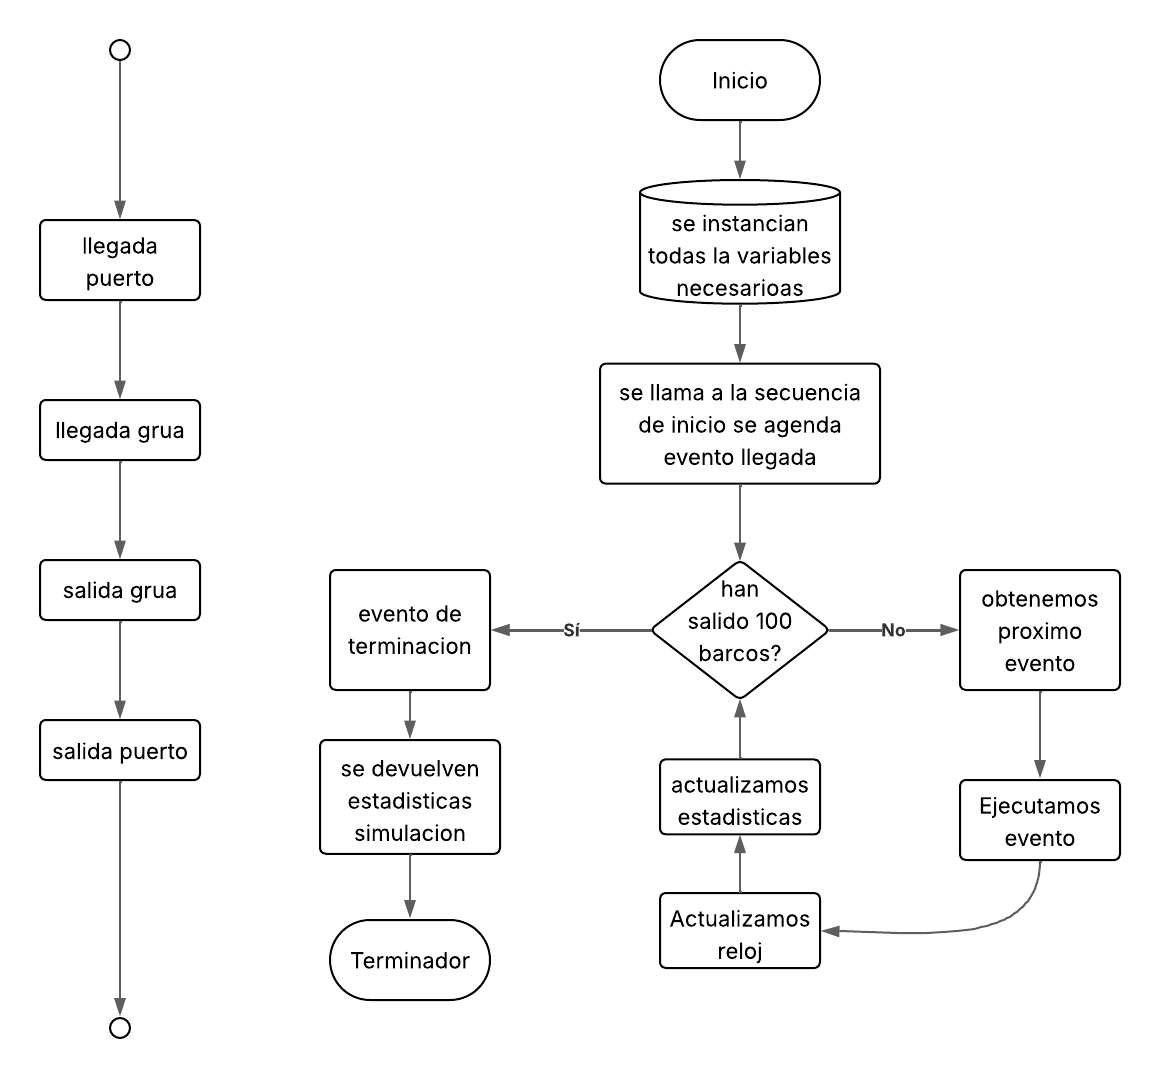



de igual forma la logica fue explicada previamente

##### Diagramas de eventos

A continuacion podremos ver los diagramas de flujo de los eventos que tiene nuestro programa

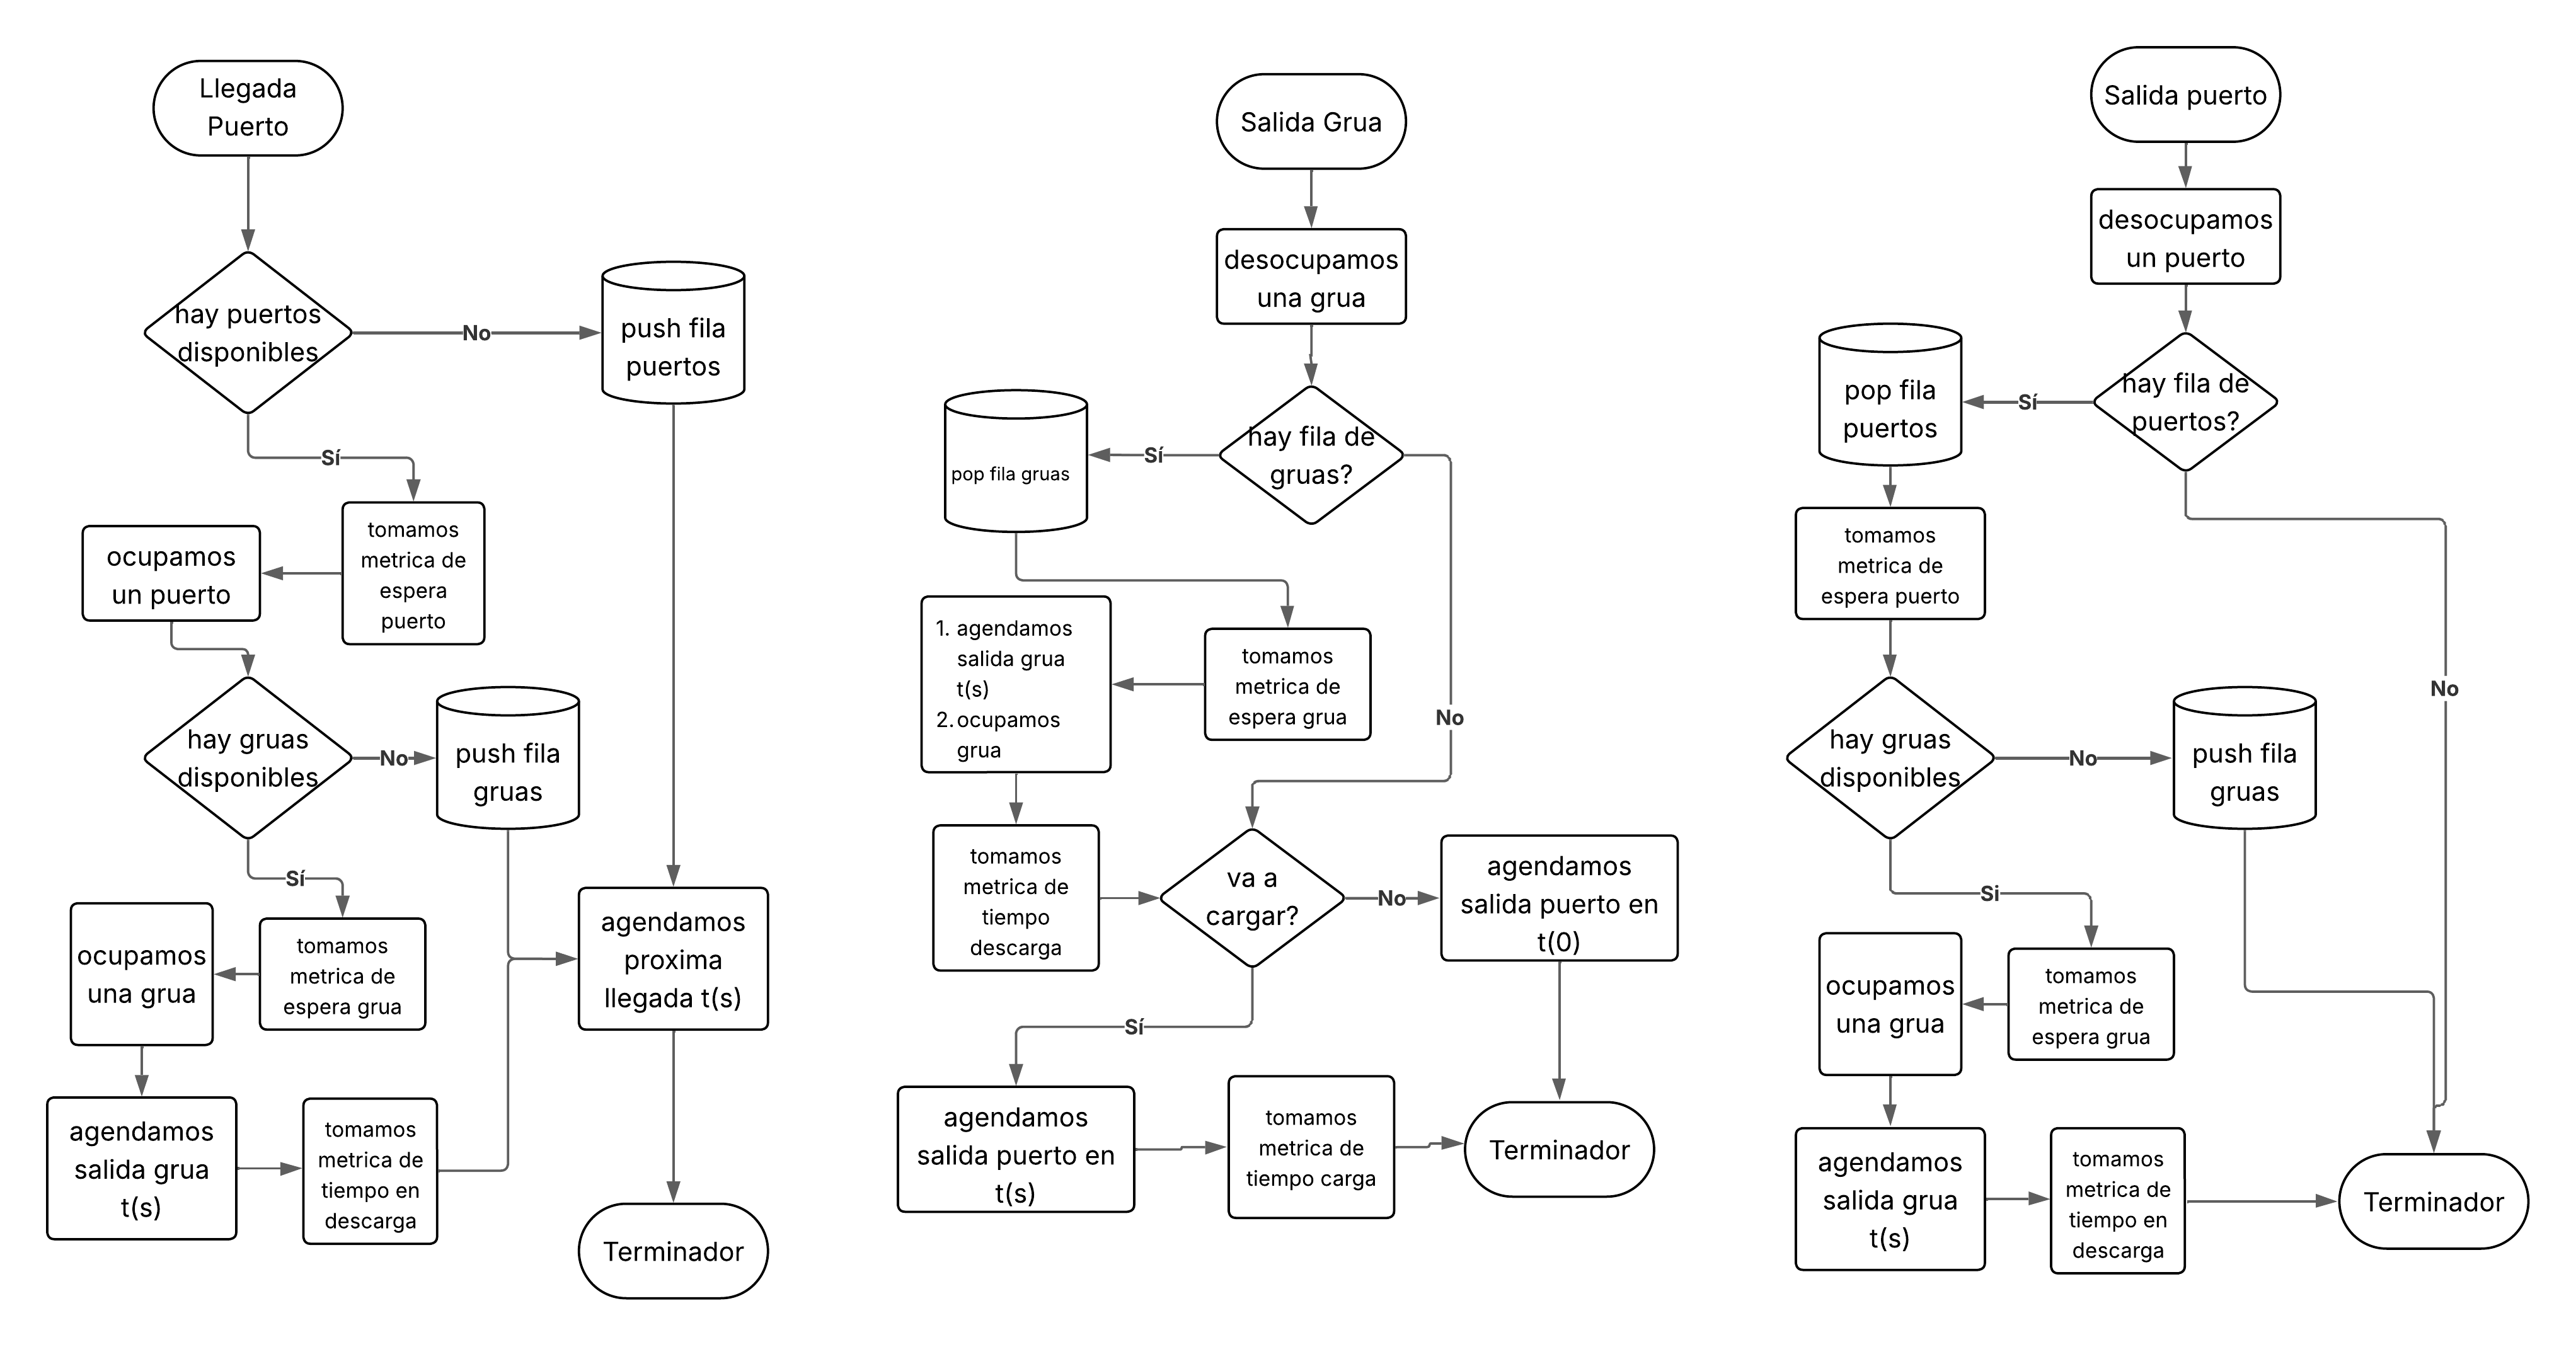!

#### Resultados

Ahora vamos a correr multiples simulaciones, y promediaremos los resultados de cada una de esta simulaciones, para poder realizar mas en menor tiempo, las simulaciones las realizamos en paralelo, con los varios nucleos de nuestro procesador, con lo cual podemos correr 1000000 simulaciones en un minuto y medio. Pero este nivel de iteracion nos da una mayor confianza.

Parallel simulation time for 1000000 runs: 83.46 seconds


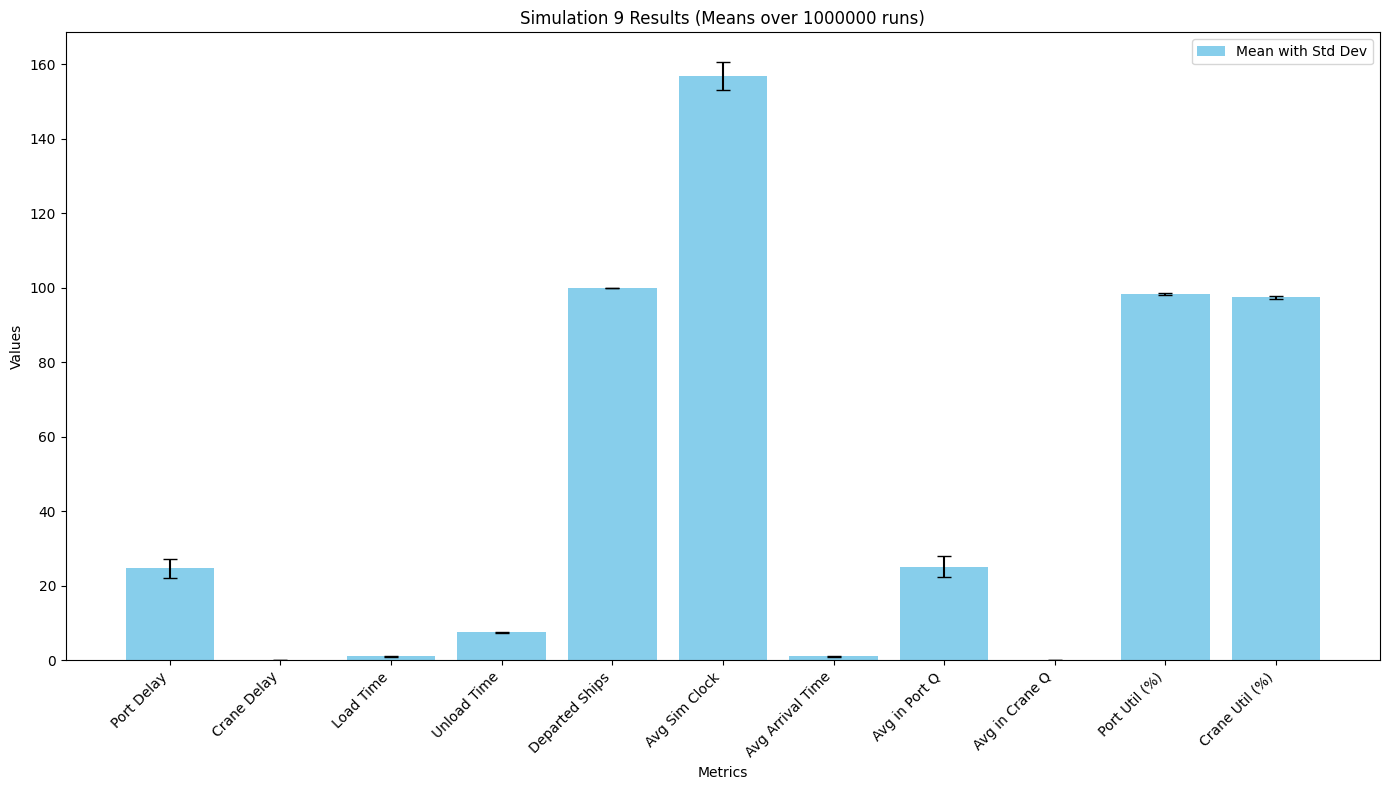

In [ ]:
from source.simulations import simulation_9 as s9
import matplotlib.pyplot as plt
import time

num_simulations = 1000000
time_start = time.time()
mean_results, std_results = s9.multiple_simulation_parallel(num_simulations)
time_end = time.time()
print(f"Parallel simulation time for {num_simulations} runs: {time_end - time_start:.2f} seconds")

s9.generate_report(None, mean_results)
plt.figure(figsize=(14, 8))
x_labels = ["Port Delay", "Crane Delay", "Load Time", "Unload Time",
            "Departed Ships", "Avg Sim Clock", "Avg Arrival Time",
            "Avg in Port Q", "Avg in Crane Q",
            "Port Util (%)", "Crane Util (%)"]

plot_means = mean_results.copy()
plot_std = std_results.copy()
if len(plot_means) > 10:
    plot_means[9] *= 100
    plot_means[10] *= 100
    plot_std[9] *= 100
    plot_std[10] *= 100

plt.bar(x_labels, plot_means, yerr=plot_std, color='skyblue', label='Mean with Std Dev', capsize=5)
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title(f"Simulation 9 Results (Means over {num_simulations} runs)")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()
plt.close()

Y aca tenemos los resultados que se guardan en un .txt

Algo interesante de los resultados es el tiempo de espera por gruas y por entrar al puerto, pues vemos que el mayor tiempo de espera en nuestra simulación es por entrar a los puertos, ya que la velocidad de descarga es mucho mayor que la velocidad de llegada, ahora el tiempo de espera por grúa, no es tanto porque dentro del puerto casi siempre solo abra un barco esperando por la grúa y solo tendrá que esperar a que se desocupe una, lo que no demorara mucho, y no se extendera excesivamente la fila, pues solo pueden estar en espera barcos que de por sí ya están en el puerto, pero para entrar en el puerto si llegan barcos constantemente.


Esto también lo podemos ver reflejado en la utilización de puertos, que es casi 100% con una desviación estándar muy baja, pero la utilización de grúas es un poco más baja y tiene una desviación estándar más alta.


### Problema Número 10
Personas llegan a una cafetería con tiempos entre llegadas de  10 ±  5 segundos. Hay dos áreas de servicio, una para comida calientes y la otra para sándwiches. El  área de comida caliente es seleccionada por 80% de los clientes y es atendida por 6 empleados. El área de sándwich tiene únicamente un empleado. Atender una comida caliente toma 1 min y un sándwich  toma 0.5 min. Cuando ellos han sido atendidos, se desplazan a la cafetería, la cual tiene una capacidad de servicio para 200 personas. El tiempo promedio para cada comida caliente  es 30  ±  10  minutos y para un sándwich , 15  ±  5   minutos. Evalué las colas  para cada servicio y la distribución del tiempo para terminar la comida, desde el tiempo de llegada. Simular para 1000 personas que terminan su comida.

#### Definicion de valores de simulación

##### Variables de estado del sistema
Estas son variables que describen al sistema en cierto instante

- **Clock**:
  Describe el tiempo actual de la simulacion

- **Lista de eventos**:
  Contiene los próximos eventos a ocurrir, los cuales se describirán en breve.

- **Estado empleados**:  
  Indica si cada empleado está libre (0) u ocupado (1).

- **Hora llegada original**:  
  Guarda el tiempo en que cada cliente llegó inicialmente al sistema. Se usa para calcular el tiempo total de permanencia.

- **Información asociada al siguiente evento**:  
  - En eventos de salida (tipo 2 o 3), guarda el índice del empleado que atendió al cliente.  
  - En eventos de consumo (tipo 4), guarda el tiempo en que inició el consumo.

- **Tipo de siguiente evento**:  
  Indica qué tipo de evento será el próximo en ocurrir.

- **Clientes consumiendo**:  
  Número de clientes que actualmente están en el área de consumo.

- **Llegadas comida caliente**:  
  Cola de espera del área de comida caliente. Cada elemento incluye el tiempo de llegada a la cola y el tiempo original al sistema.

- **Llegadas sándwich**:  
  Cola de espera del área de sándwiches. Cada elemento incluye el tiempo de llegada a la cola y el tiempo original al sistema.

- **Llegadas a consumo**:  
  Cola de espera para el área de consumo cuando está llena. Cada entrada incluye el tiempo de llegada a la cola, el tiempo original al sistema y el área de origen (1: comida caliente, 2: sándwich).

- **Hora del último evento**:  
  Marca el tiempo en que ocurrió el último evento procesado.



##### Entidades y atributos

Las entidades principales serían dos:

- **Clientes**:  
  Son las entidades principales que atraviesan el sistema. Llegan a la cafetería, eligen un tipo de comida (80% comida caliente, 20% sándwich), esperan ser atendidos, consumen su comida y luego salen. Cada cliente tiene atributos como el tiempo de llegada, tipo de comida, tiempos de espera, servicio y consumo.

- **Empleados**:  
  Son los recursos que atienden a los clientes. Hay 6 empleados asignados al área de comida caliente y 1 al área de sándwiches. Su estado puede ser libre u ocupado y se asocian a eventos de inicio y fin de servicio.


Algunos atributos realistas de los clientes serían los siguientes, aunque la simulación no requerirá todos ellos:

| Atributo               | Descripción                                                          |
|------------------------|----------------------------------------------------------------------|
| `id`                   | Identificador único del cliente                                      |
| `tLlegada`             | Hora en que el cliente llega a la cafetería                         |
| `tipoComida`           | Tipo de comida solicitada (1: comida caliente, 2: sándwich)         |
| `tInicioServicio`      | Hora en que comienza a ser atendido                                 |
| `tFinServicio`         | Hora en que termina el servicio                                      |
| `tInicioConsumo`       | Hora en que inicia su consumo en la cafetería                       |
| `tFinConsumo`          | Hora en que finaliza su consumo                                     |
| `tiempoTotalSistema`   | Tiempo total desde su llegada hasta que finaliza el consumo         |




Y en el caso de los empleados:

| Atributo               | Descripción                                                |
|------------------------|------------------------------------------------------------|
| `id`                   | Identificador único del empleado                           |
| `area`                 | Área a la que pertenece (1: comida caliente, 2: sándwich)  |
| `estado`               | Estado actual (0: libre, 1: ocupado)                        |
| `tInicioServicio`      | Hora en que comenzó a atender al cliente actual            |
| `tFinServicio`         | Hora en que terminará de atender al cliente actual         |


##### Eventos


Se identificaron cuatro eventos principales para modelar el problema:

1. **Llegada de cliente al área de servicio**  
   Un nuevo cliente entra al sistema. Se decide si va al área de comida caliente (80%) o al área de sándwiches (20%). Si hay empleados disponibles, comienza el servicio; de lo contrario, entra en la cola correspondiente.

2. **Salida del área de comida caliente**  
   El cliente ha sido atendido por un empleado del área de comida caliente. Luego se dirige al área de consumo (si hay espacio disponible); si no, significa que se superó la capacidad del sistema. Si bien se pensó en añadir una cola para el consumo, esta no está en el problema original.

3. **Salida del área de sándwiches**  
   El cliente ha sido atendido por el empleado del área de sándwiches y pasa al área de consumo, si hay espacio.

4. **Salida del área de consumo**  
   El cliente ha terminado de comer. Se registra su salida del sistema y se actualizan estadísticas como el tiempo total de permanencia.


Estos serán explicados más a detalle en los diagramas de flujo y, por supuesto, en el programa de simulación. Será claro que la separación de los eventos de salida de las áreas se dió para manejar fácilmente las colas de clientes en espera y los tiempos de consumo.




##### Contadores y Acumuladores

Los principales contadores estadísticos son los siguientes:

- `areas_Employees_Status`: Estado de los empleados en cada área (ocupado o libre).
- `area_Num_Consuming`: Sumatoria de clientes que se encuentran consumiendo en la cafetería.
- `area_Num_Waiting_Consumption`: Total de clientes esperando para acceder al área de consumo.
- `area_Num_Waiting_Hot`: Total de clientes en cola para el servicio de comida caliente.
- `area_Num_Waiting_Sandwich`: Total de clientes en cola para el servicio de sándwiches.
- `num_Delayed_Consumption`: Número de clientes que han tenido que esperar antes de consumir.
- `num_Delayed_Hot`: Número de clientes que han tenido que esperar en el área de comida caliente.
- `num_Delayed_Sandwich`: Número de clientes que han tenido que esperar en el área de sándwiches.
- `num_Done_Clients`: Número total de clientes que han terminado su consumo y salido del sistema.
- `total_Delay_Consuming`: Tiempo acumulado de permanencia en el área de consumo.
- `total_Delay_For_Consumption`: Tiempo acumulado de espera para acceder al área de consumo.
- `total_Delay_Hot`: Tiempo total de espera en la cola de comida caliente.
- `total_Delay_Sandwich`: Tiempo total de espera en la cola de sándwiches.
- `total_Time_In`: Tiempo total que los clientes han pasado en el sistema (llegada hasta salida).

También hay contadores adicionales (para múltiples repeticiones):

- `reps_Avgs`: Lista de promedios generales obtenidos por repetición del experimento (sin incluir ocupación individual).
- `avg_Employee_Occupation`: Lista de promedios de ocupación individual de los empleados.
- `sum_Reps_Avgs`: Sumatoria de promedios generales (sin incluir ocupación individual) acumulados en todas las repeticiones.
- `sum_Avg_Employee_Occupation`: Sumatoria acumulada de promedios de ocupación individual de los empleados en todas las repeticiones.
- `total_Times_In_List`: Lista de tiempos totales de estancia de los clientes (una por repetición).
- `all_Times_In`: Lista completa de todos los tiempos de estancia de todos los clientes (todas las repeticiones).


##### Medidas de Desempeño

A continuación, se presentan las principales métricas de desempeño obtenidas a partir de la simulación del sistema de cafetería. No obstante, cabe aclarar que las solicitadas y más relevantes son las que evalúan las colas y los tiempos de duración en el sistema.

- **Average delay in the service area**: *Tiempo promedio que un cliente espera antes de ser atendido en cualquier área de servicio.*
- **Average delay for the hot food service area**: *Tiempo promedio de espera en la cola de comida caliente.*
- **Average delay for the sandwich service area**: *Tiempo promedio de espera en la cola de sándwiches.*
- **Average time consuming**: *Tiempo promedio que los clientes pasan consumiendo su comida.*
- **Average time in the system**: *Tiempo total promedio que un cliente permanece en el sistema (desde que llega hasta que termina de consumir).*
- **Average number in service queue**: *Promedio de clientes esperando en las colas de servicio.*
- **Average number in hot food service queue**: *Promedio de clientes en la cola de comida caliente.*
- **Average number in sandwich service queue**: *Promedio de clientes en la cola de sándwiches.*
- **Average number in consumption area (consuming)**: *Promedio de clientes consumiendo dentro de la cafetería.*
- **Employees occupation**: *Porcentaje promedio de tiempo en el que todos los empleados están ocupados.*
- **Hot food service employees occupation**: *Porcentaje promedio de ocupación de los empleados del área de comida caliente.*
- **Sandwich service employee occupation**: *Porcentaje de ocupación del empleado de la sección de sándwiches.*
- **Consumption area utilization**: *Porcentaje promedio de uso del área de consumo respecto a su capacidad.*


#### Diagrama de flujo

##### Diagrama del programa general

El siguiente diagrama describe en general como funciona la rutina principal del programa, llamada main, que invoca a los diferentes eventos y las subrutinas de *timing* y actualización de estadísticas temporales acumuladas.

![Diagrama del programa general](diagramas/main_10.png)



Conviene destacar la posibilidad de múltiples experimentos en el programa principal, de modo que se obtienen resultados más precisos.

De cualquier modo, esto no significa que no se pueda ejecutar una solo y se produzca el reporte convencional.

##### Diagramas de eventos

A continuación, se muestran los diagramas de flujo de los eventos que tiene esta simulación, como se describieron anteriormente.

![Diagrama de eventos](diagramas/arrive_depart_10.png)
![Diagrama de eventos](diagramas/depart_depart_10.png)

#### Resultados y Análisis

Finalmente, se procede a ejecutar varias simulaciones o experimentos y promediar los resultados, en este caso las simulaciones se realizan secuencialmente (una tras otra), como se indicó en el diagrama de flujo. Por ello se opta por usar una cantidad moderada de replicaciones.

Parallel simulation time for 1000000 runs: 83.46 seconds


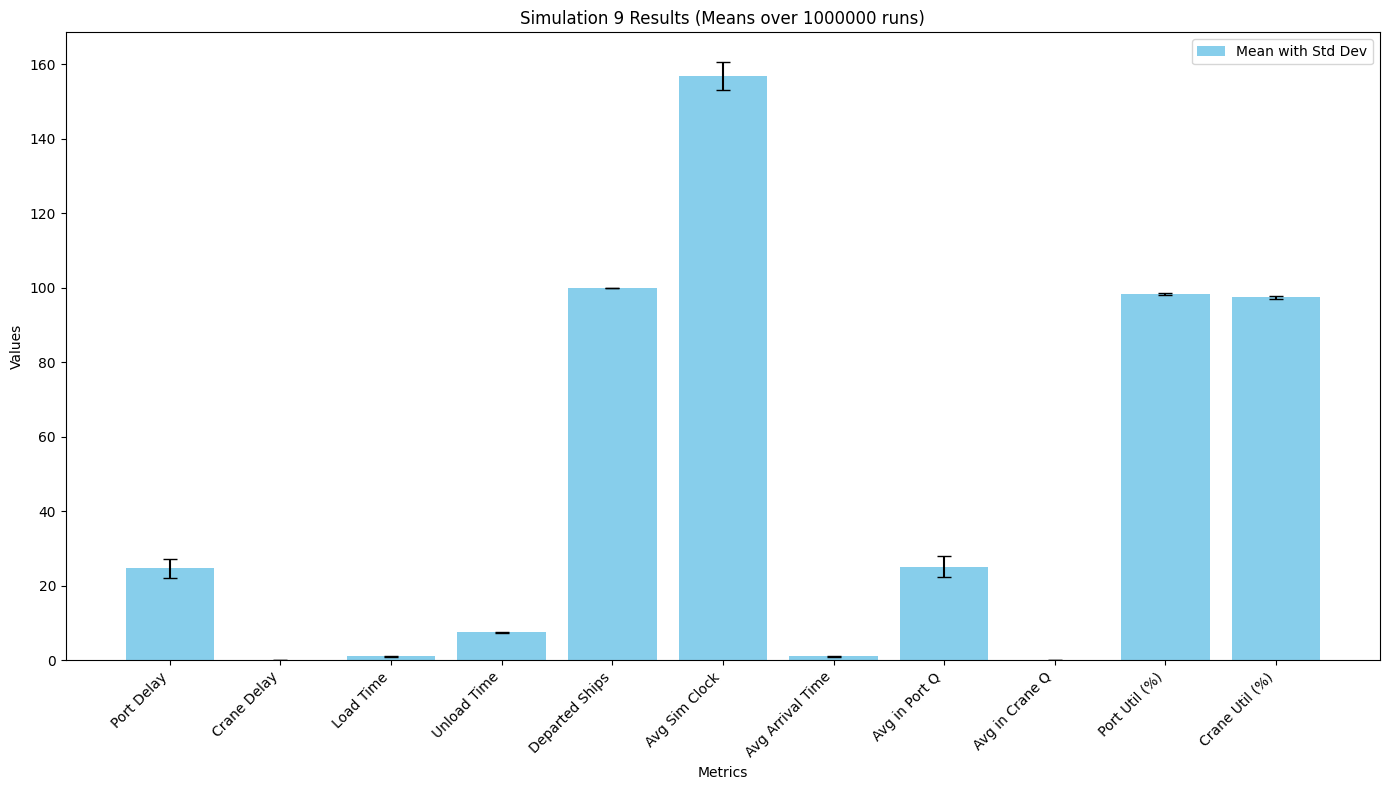

In [ ]:
from source.simulations import simulation_10 as s10
import matplotlib.pyplot as plt
import time

### Parametros del programa ###
REPS = 100
REPS_SHOWN = 3

### Parametros de la simulacion ###
CONSUMPTION_QUEUE = False  # Existencia de cola de espera para el area de consumo
ARRIVE_UNIFORM_RANGE = (5, 15)   # Rango de tiempo de llegada al area de servicio (en segundos)
HOT_SERVICE_PROBABILITY = 0.8  # Probabilidad de que un cliente elija el area de servicio de comida caliente
ATTENTION_TIMES = np.array([60,30], dtype=np.int32)  # Tiempo para comida caliente y para sandwich (en segundos)
EATING_HOT_UNIFORM_RANGE = (20, 40)  # Rango de tiempo de consumo para comida caliente (en segundos)
EATING_SANDWICH_UNIFORM_RANGE = (10, 20)  # Rango de tiempo de consumo para sandwich (en segundos)
CAPACITY = 200  # Capacidad del area de consumo
NUM_CLIENTS_REQUIRED = 1000  # Numero de clientes a procesar completamente
NUM_EMPLOYEES_HOT = 6  # Numero de empleados en el area de servicio de comida caliente
NUM_EMPLOYEES_SANDWICH = 1  # Numero de empleados en el area de servicio de sandwich

# Ejecucion de las simulaciones
simulation = s10.Simulation_10()
time_start = time.time()
simulation.main(REPS, REPS_SHOWN)
time_end = time.time()
print(f"Sequential simulation time for {REPS} runs: {time_end - time_start:.2f} seconds")


La distribución del tiempo total en el sistema muestra un comportamiento mixto, con una primera meseta entre aproximadamente 700 y 1200 segundos, seguida de un aumento notorio en la densidad a partir de ese punto. Esto sugiere que hay al menos dos grupos principales de clientes: uno que completa su paso por el sistema en menor tiempo (posiblemente aquellos que acceden rápidamente al área de consumo), y otro que permanece más tiempo, probablemente por acumulación en las colas o diferencias en el tipo de servicio (comida caliente vs. sándwich). El salto visible en la densidad alrededor de los 1250 segundos también indica que hay una transición estructural en el flujo del sistema que afecta a muchos clientes de forma parecida.

En general, la distribución se comporta como una especie de mezcla de uniformes con una ruptura o cambio de régimen claro, lo cual es coherente con la naturaleza del sistema simulado: una red de atención en donde existen tiempos constantes de servicio y de consumo, pero con aleatoriedad en las llegadas y decisiones de los clientes. La densidad se mantiene relativamente constante en el segundo tramo (1250 a 2400 s), lo que indica un flujo más estable en ese rango de tiempo. Este tipo de análisis puede ser útil para detectar cuellos de botella o fases del sistema donde el tiempo de permanencia se vuelve crítico.

Por otro lado, este es un ejemplo de los resultados del reporte final, que se guardan en un archivo ".txt".

Los resultados obtenidos de la simulación proporcionan información sobre el rendimiento de la cafetería, enfocándose en los tiempos de espera, ocupación de empleados y uso del área de consumo.

El retraso promedio en el área de servicio fue de 8.58 segundos, lo que sugiere que los clientes no tuvieron que esperar mucho para ser atendidos en general. La distribución de estos retrasos muestra que la área de comida caliente presentó un retraso promedio de 1.27 segundos, lo que refleja una operación eficiente. Por otro lado, la área de sándwiches experimentó un retraso promedio de 31.58 segundos, que es significativamente más alto, lo cual probablemente se debe a que solo hay un empleado atendiendo en esa área, lo que genera un cuello de botella.

El tiempo promedio de consumo fue de 1556.59 segundos (aproximadamente 26 minutos), lo que sugiere que los clientes tardan un tiempo considerable para consumir sus alimentos en el área de consumo. Este valor es relativamente alto, lo que podría indicar que el tiempo de consumo es más largo de lo esperado.

El tiempo total promedio de estancia en el sistema fue de 1617.95 segundos (aproximadamente 27 minutos), lo que incluye el tiempo de espera, el servicio y el consumo. Este valor es bastante alto, lo que indica que los clientes permanecen mucho tiempo en el sistema, lo que podría ser consecuencia del largo tiempo de consumo.

En cuanto a las colas de servicio, el número promedio de clientes en cola fue de 0.91, lo que indica que en promedio, casi un cliente está esperando en la cola en cualquier momento. La cola de comida caliente tuvo un promedio de solo 0.10 clientes, mientras que la cola de sándwiches presentó un promedio de 0.80 clientes, lo que refleja la congestión en esa área debido al bajo número de empleados.

En cuanto a la ocupación de los empleados, el promedio fue de 79.21%, lo que muestra una buena utilización de los recursos humanos. Sin embargo, se observa que algunos empleados de la área de comida caliente tienen una ocupación baja (alrededor de 57.57%), mientras que otros están más ocupados (hasta 90.73%). Esto sugiere que la carga de trabajo no está distribuida equitativamente, y algunos empleados están más ocupados que otros. El empleado de la área de sándwiches tiene una ocupación de 75.80%, lo que indica que está relativamente ocupado, pero se podría mejorar la eficiencia de esa área si se añaden más empleados.

El porcentaje de uso del área de consumo fue de 76.40%, lo que indica que, a pesar de la capacidad del área para 200 personas, aproximadamente 152.81 clientes están utilizando el área de consumo en cualquier momento. Esto muestra una buena utilización del espacio, pero también sugiere que podría haber un margen para mejorar la distribución de clientes entre las áreas.

La simulación duró 11129.56 segundos (aproximadamente 185.49 minutos o 3.09 horas), y durante ese tiempo, se atendieron un total de 1000 clientes. Este marco temporal refleja la duración de la simulación y permite evaluar el desempeño general del sistema.

En resumen, los resultados muestran que la cafetería tiene una operación bastante eficiente en términos de atención a los clientes en la área de comida caliente, pero la área de sándwiches presenta un cuello de botella debido a la asignación de solo un empleado. Además, aunque la ocupación de los empleados es bastante alta, hay algunas disparidades en la distribución de tareas entre los empleados, lo que podría optimizarse. El tiempo total de estancia en el sistema es relativamente alto, principalmente debido al largo tiempo de consumo, lo que puede mejorarse para agilizar el flujo de clientes.

Se puede decir que obtuvimos un resultado cercano, teniendo en cuenta que solo usamos 10 valores generados para la media.